<h4> NAME: VINAYAK MALI</h4>
<h4> ROLL: 24AI60R13</h4>

---


## Global Functions

In [77]:
import numpy as np
print("Function to load image and convert to array")
def get_image_from_path(path):
    image = Image.open(path)
    image_array = np.array(image)
    return image, image_array

Function to load image and convert to array


In [78]:
import requests
from io import BytesIO
from PIL import Image

print("Function which can fetch image from my github acc")
def fetch_image(url,display=False):
    response = requests.get(url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content)).convert("RGB")
    if display:
        display_image(image)
    return image

Function which can fetch image from my github acc


In [79]:
import numpy as np

print("Function to convert image to array")
def image_to_array(image):
    return np.array(image)

Function to convert image to array


In [80]:
import matplotlib.pyplot as plt

print("Function to display image")
def display_image(image):
    plt.figure(figsize=(image.width / 100, image.height / 100), dpi=100)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

Function to display image


In [81]:
import numpy as np

print("DFT Function from scratch using numpy only")
def DFT(f):
    M , N = np.shape(f)                 # getting image shape
    F = np.zeros((M,N),dtype=complex)   # generating DFT with zeros
    exp_rows = np.zeros((M,M),dtype=complex)  # generating exponential matrix for rows
    exp_clumns = np.zeros((M,N),dtype=complex)  # generating exponential matrix for columns
    # Exp matrix for rows
    for u in range(M):
        for v in range(M):
            exp_rows[u,v] = np.exp(-2j * np.pi * u * v / M)
    # Exp matrix for columns
    for u in range(N):
        for v in range(N):
            exp_clumns[u,v] = np.exp(-2j * np.pi * u * v / N)
    # Applying matrix formula on all above matrices
    # Formula is exp*image*exp^H so I am making 2 dot products
    F = np.dot(exp_rows,f)
    F = np.dot(F,exp_clumns.conj().T)
    return F

DFT Function from scratch using numpy only


Using above same logic I am creating IDFT

In [82]:
import numpy as np

print("IDFT Function from scratch using numpy only")
def IDFT(F):
    M, N = np.shape(F)
    f = np.zeros((M, N), dtype=complex)     # image is small f as per class notes/ppts
    exp_rows = np.zeros((M, M), dtype=complex)
    exp_columns = np.zeros((N, N), dtype=complex)
    # Exp matrix for rows
    for u in range(M):
        for v in range(M):
            exp_rows[u, v] = np.exp(2j * np.pi * u * v / M)
    # Exp matrix for columns
    for u in range(N):
        for v in range(N):
            exp_columns[u, v] = np.exp(2j * np.pi * u * v / N)

    # Formula is exp * F * exp^H, and I normalize by 1/(M*N)
    f = np.dot(exp_rows, F)  # First multiplication
    f = np.dot(f, exp_columns.conj().T)  # Second multiplication
    f /= (M * N)  # Normalize the result by the size of the input
    return f

IDFT Function from scratch using numpy only


In [83]:
import numpy as np
print("Library DFT function")
def library_DFT(f):
    F = np.fft.fft2(f)
    return F

Library DFT function


In [84]:
import numpy as np
print("Library IDFT function")
def library_IDFT(F):
    f = np.fft.ifft2(F)
    return f

Library IDFT function


In [85]:
import numpy as np
print("Function to convert complex to int")
def complex_to_int(number):
    number = np.round(number.real).astype(int)
    return number

Function to convert complex to int


In [86]:
print("Function to get magnitude and phase part of complex number")
def get_magnitude_and_phase(complex_number):
    magnitude = np.sqrt(complex_number.real**2 + complex_number.imag**2)
    phase = np.arctan2(complex_number.imag, complex_number.real)
    return magnitude, phase

Function to get magnitude and phase part of complex number


In [87]:
print("Maginitude and phase of IDFT matrix")
def get_magnitude_and_phase_of_matrix(matrix):
    magnitude = np.sqrt(matrix.real**2 + matrix.imag**2)
    phase = np.arctan2(matrix.imag, matrix.real)
    return magnitude, phase

Maginitude and phase of IDFT matrix


Both functions are same but still keeping

In [88]:
print("Function to get complex number from magnitude and phase")
def get_complex_from_magnitude_and_phase(magnitude, phase):
    real_part = magnitude * np.cos(phase)
    imag_part = magnitude * np.sin(phase)
    complex_number = real_part + 1j * imag_part
    return complex_number

Function to get complex number from magnitude and phase


---

#### Example to check above with simple matrix

In [89]:
image = np.array([[0, 1], [2, 3]])  # Example 2D array
my_DFT_result = DFT(image)
library_DFT_result = library_DFT(image)
print("Image:\n"+str(image))
print("DFT from scratch:\n"+str(my_DFT_result))
print("Library DFT:\n"+str(library_DFT_result))

# Validating
are_equal = np.allclose(my_DFT_result, library_DFT_result, atol=1e-10)
print("\nAre the DFT results equal?", are_equal)

Image:
[[0 1]
 [2 3]]
DFT from scratch:
[[ 6.00000000e+00+0.0000000e+00j -2.00000000e+00+4.8985872e-16j]
 [-4.00000000e+00-6.1232340e-16j  4.49927935e-32-1.2246468e-16j]]
Library DFT:
[[ 6.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]

Are the DFT results equal? True


In [90]:
print("Lets verify the above results in IDFT")
my_IDFT_result = IDFT(my_DFT_result)
library_IDFT_result = library_IDFT(my_DFT_result)
print("My IDFT:\n"+str(my_IDFT_result))
print("Library IDFT:\n"+str(library_IDFT_result))

Lets verify the above results in IDFT
My IDFT:
[[0.-6.1232340e-17j 1.-1.8369702e-16j]
 [2.+1.8369702e-16j 3.-6.1232340e-17j]]
Library IDFT:
[[0.-6.12323400e-17j 1.-2.44929360e-16j]
 [2.+3.06161700e-16j 3.-2.46519033e-32j]]


IDFT is same

Lets check wther it retrive original matrix

In [91]:
my_idft_int = np.round(my_IDFT_result.real).astype(int)
library_idft_int = np.round(library_IDFT_result.real).astype(int)

print("My IDFT as integers:\n", my_idft_int)
print("Library IDFT as integers:\n", library_idft_int)

My IDFT as integers:
 [[0 1]
 [2 3]]
Library IDFT as integers:
 [[0 1]
 [2 3]]


Lets extract maginitude and phase

In [92]:
get_magnitude_and_phase_of_matrix(my_IDFT_result)

(array([[6.123234e-17, 1.000000e+00],
        [2.000000e+00, 3.000000e+00]]),
 array([[-1.57079633e+00, -1.83697020e-16],
        [ 9.18485099e-17, -2.04107800e-17]]))

Results are matching as well as converting matrix back to normal properly

## Task 1

Loading image a_3_task_1_input.png


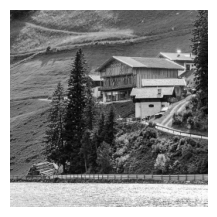

In [93]:
print("Loading image a_3_task_1_input.png")
im_path = "/content/a_3_task_1_input.png"
im_t1, im_t1_array = get_image_from_path(im_path)
display_image(im_t1)

To calculate deviation I am using standard formula i.e. `my own appraoch`

$$
\sigma = \frac{\text{cutoff}}{division factor * \sqrt{2 \cdot \ln(2)}}
$$

Here i have take division factor so that i can reduce the sigma value and run a for loop to get multiple results

In [94]:
print("Gussian bandpass filter")
def bandpass_filter(im, high_cutoff, low_cutoff, division_factor = 1, is_print = True):
    def calculate_sigma_from_cutoff(cut_off_value):
        sigma = cut_off_value / np.sqrt(2 * np.log(2))
        return sigma

    def gaussian_low_pass_filter(no_rows, no_cols, sigma):
        if is_print:
            print("Gussian low pass functions")
        x = np.linspace(-no_cols // 2, no_cols // 2, no_cols)
        y = np.linspace(-no_rows // 2, no_rows // 2, no_rows)
        X, Y = np.meshgrid(x, y)
        d = np.sqrt(X**2 + Y**2)
        low_pass_filter = np.exp(-(d**2) / (2 * (sigma**2)))
        return low_pass_filter

    def gaussian_high_pass_filter(no_rows, no_cols, sigma):
        if is_print:
            print("Gussian High Pass functions")
        low_pass = gaussian_low_pass_filter(no_rows, no_cols, sigma)
        high_pass_filter = 1 - low_pass
        return high_pass_filter

    rows, cols = im.shape
    F = DFT(im)

    low_sigma = calculate_sigma_from_cutoff(low_cutoff) / division_factor
    if is_print:
        print(f"Deviation (sigma) value from cutoff {low_cutoff} is {low_sigma}")
    low_pass = gaussian_low_pass_filter(rows, cols, low_sigma)

    high_sigma = calculate_sigma_from_cutoff(high_cutoff) / division_factor
    if is_print:
        print(f"Deviation (sigma) value from cutoff {high_cutoff} is {high_sigma}")
    high_pass = gaussian_high_pass_filter(rows, cols, high_sigma)

    band_pass = low_pass * high_pass
    filtered_result = F * band_pass

    f_complex = IDFT(filtered_result)
    # As we know it will return complex number matrix so I am converting it into int
    f_int = complex_to_int(f_complex)
    if is_print:
        print(f_int)
    # Checking minimum and maximum value of f_int
        print(f'\nMin value of f_int: {f_int.min()}')
        print(f'Max value of f_int: {f_int.max()}')
    # after running this code minimum value we get is -2 so I am cliping the values in range 0 to 255
    f = np.clip(f_int, 0, 255).astype(np.uint8)
    if is_print:
        print(f'\nMin value of f: {f.min()}')
        print(f'Max value of f: {f.max()}')
    return f

Gussian bandpass filter


Deviation (sigma) value from cutoff 120 is 101.91861603456229
Gussian low pass functions
Deviation (sigma) value from cutoff 100 is 84.93218002880191
Gussian High Pass functions
Gussian low pass functions
[[-1 -2  2 ... 23 16 15]
 [ 4  4  5 ...  6 12 20]
 [ 9 13 10 ... 10 13 18]
 ...
 [43 43 34 ... 43 48 48]
 [42 41 41 ... 48 39 41]
 [42 49 49 ... 47 38 33]]

Min value of f_int: -6
Max value of f_int: 56

Min value of f: 0
Max value of f: 56


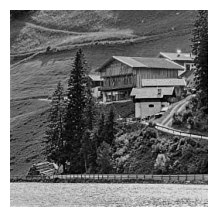

In [95]:
Gussian_filtered_image_array_scratch = bandpass_filter(im_t1_array, high_cutoff=100, low_cutoff=120, division_factor = 1)
Gussian_filtered_image_scratch = Image.fromarray(Gussian_filtered_image_array_scratch)
display_image(Gussian_filtered_image_scratch)

High sigma: 84.93218002880191
Low sigma: 101.91861603456229


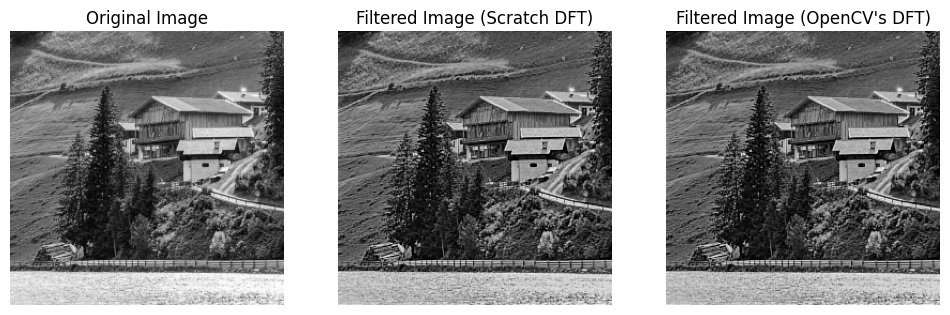

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def opencv_implementaion(img, high_cutoff = 100.0, low_cutoff = 120.0, division_factor = 1):
    def calculate_sigma_from_cutoff(cut_off_value):
        sigma = cut_off_value / np.sqrt(2 * np.log(2))
        return sigma

    # Perform DFT using OpenCV
    dft_opencv = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

    high_sigma = calculate_sigma_from_cutoff(high_cutoff) / division_factor
    low_sigma = calculate_sigma_from_cutoff(low_cutoff) / division_factor

    def create_gaussian_filter_opencv(shape, cutoff, sigma, filter_type='low'):
        rows, cols = shape
        x = np.linspace(-cols // 2, cols // 2 - 1, cols)
        y = np.linspace(-rows // 2, rows // 2 - 1, rows)
        X, Y = np.meshgrid(x, y)

        d = np.sqrt(X**2 + Y**2)

        if filter_type == 'low':
            gaussian_filter = np.exp(-(d**2) / (2 * (sigma ** 2)))
        elif filter_type == 'high':
            gaussian_filter = 1 - np.exp(-(d**2) / (2 * (sigma ** 2)))

        return gaussian_filter

    # Create OpenCV filters
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    # Low-pass filter
    low_pass_mask = create_gaussian_filter_opencv(img.shape, low_cutoff, low_sigma, filter_type='low')
    low_pass_mask = np.stack((low_pass_mask, low_pass_mask), axis=-1)

    # High-pass filter
    high_pass_mask = create_gaussian_filter_opencv(img.shape, high_cutoff, high_sigma, filter_type='high')
    high_pass_mask = np.stack((high_pass_mask, high_pass_mask), axis=-1)

    # Apply filters
    filtered_opencv = dft_opencv * low_pass_mask * high_pass_mask
    idft_opencv = cv2.idft(filtered_opencv)
    result_opencv = cv2.magnitude(idft_opencv[:, :, 0], idft_opencv[:, :, 1])
    result_opencv = cv2.normalize(result_opencv, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return result_opencv, high_sigma, low_sigma

result_opencv, high_sigma, low_sigma = opencv_implementaion(im_t1_array, high_cutoff = 100.0, low_cutoff = 120.0, division_factor = 1)
print(f"High sigma: {high_sigma}")
print(f"Low sigma: {low_sigma}")

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(im_t1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Filtered Image (Scratch DFT)')
plt.imshow(Gussian_filtered_image_scratch, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Filtered Image (OpenCV's DFT)")
plt.imshow(result_opencv, cmap='gray')
plt.axis('off')

plt.show()

Now lets check how smaller sigma values update the results

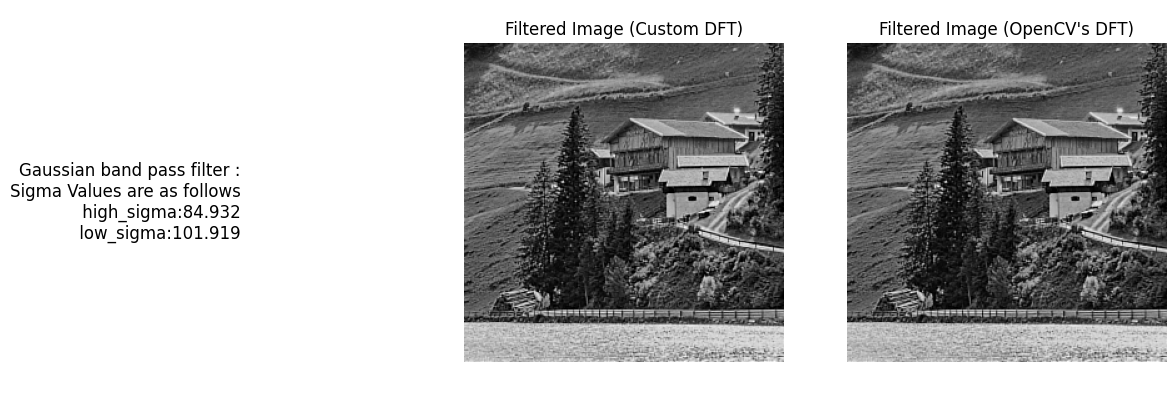

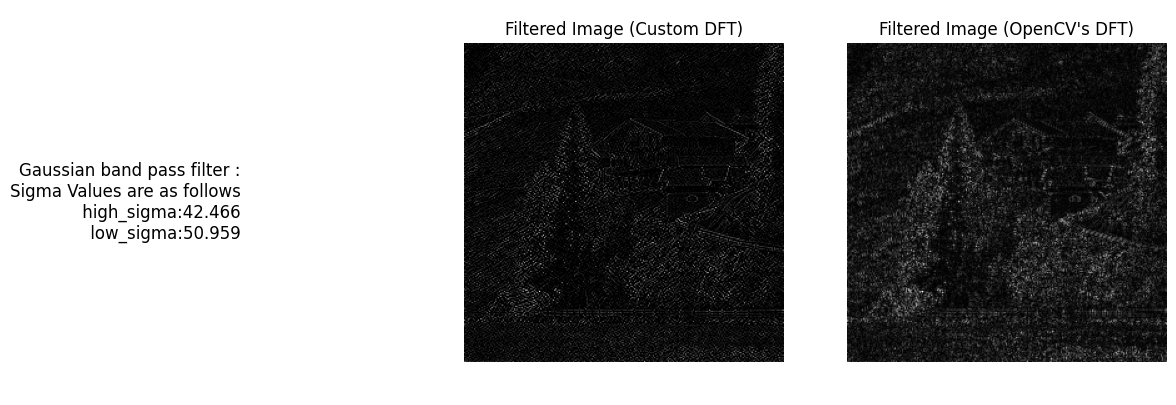

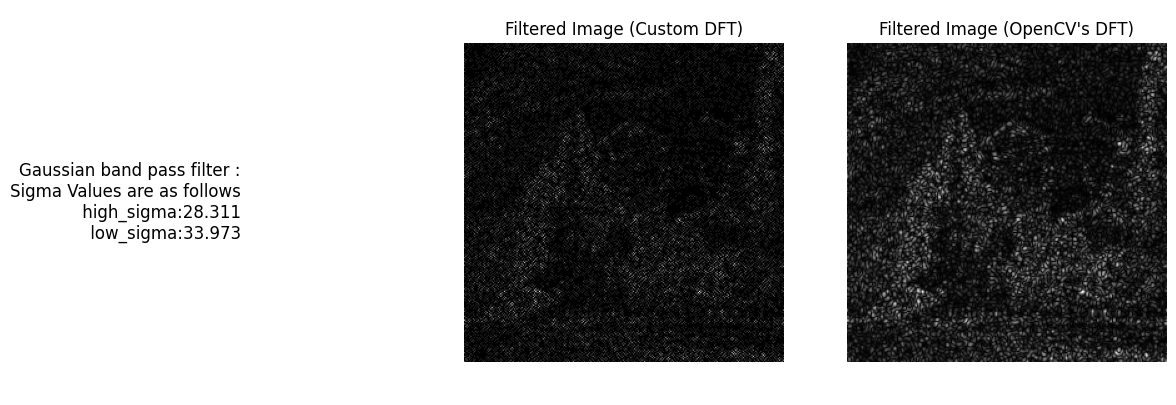

In [97]:
for division_factor in range(1,4):
    result_scratch = Image.fromarray(bandpass_filter(im_t1_array, high_cutoff=100, low_cutoff=120, division_factor = division_factor, is_print = False))
    result_opencv, high_sigma, low_sigma = opencv_implementaion(im_t1_array, high_cutoff = 100.0, low_cutoff = 120.0, division_factor = division_factor)
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 3, 1)
    plt.text(0.5, 0.5, f'Gaussian band pass filter :\nSigma Values are as follows\n high_sigma:{round(high_sigma, 3)}\n low_sigma:{round(low_sigma, 3)}', fontsize=12, ha='right', va='center')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Filtered Image (Custom DFT)')
    plt.imshow(result_scratch, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Filtered Image (OpenCV's DFT)")
    plt.imshow(result_opencv, cmap='gray')
    plt.axis('off')

    plt.show()

When the sigma value of a Gaussian filter decreases, the filter becomes narrower and less smoothing, preserving more detail and enhancing edges. However, it also increases sensitivity to noise and may introduce artifacts if too low.

As we can see after reducing sigma value to much image is getting completely distored in both custom and opencv appraoch

## Task 2

### Loading Images

Image 1 for task 3


array([[ 27,  38,  27, ..., 173, 172, 171],
       [ 17,  25,  32, ..., 170, 169, 167],
       [ 31,  23,  37, ..., 167, 163, 160],
       ...,
       [ 50,  33,  26, ...,  95, 110, 135],
       [ 29,  26,  24, ...,  92,  96, 104],
       [ 24,  35,  29, ...,  82,  80,  95]], dtype=uint8)
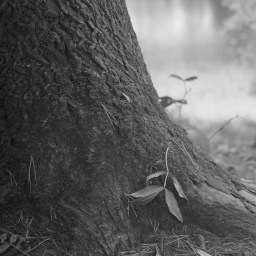

In [98]:
print("Image 1 for task 3")
im1_path = "/content/a_3_task_2_im1.png"
im1, im1_array = get_image_from_path(im1_path)
im1_array

Image 2 for task 3


array([[64, 64, 63, ...,  2,  2,  3],
       [64, 65, 63, ...,  1,  2,  3],
       [65, 65, 64, ...,  2,  2,  3],
       ...,
       [49, 48, 47, ...,  5,  5,  5],
       [48, 47, 45, ...,  5,  5,  5],
       [47, 47, 45, ...,  5,  6,  5]], dtype=uint8)
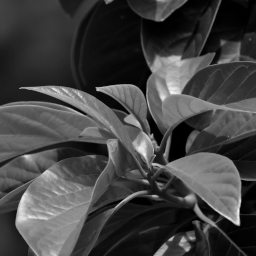

In [99]:
print("Image 2 for task 3")
im2_path = "/content/a_3_task_2_im2.png"
im2, im2_array = get_image_from_path(im2_path)
im2_array

### Converting to DFT

In [100]:
print("DFT of image 1")
im1_dft = DFT(im1_array)
print(im1_dft)

DFT of image 1
[[6306306.              +0.j            6860.26396168-1795951.9060738j
  -152014.93390584 -487472.23945902j ...
    28669.03707108 +401630.7797332j  -152014.93390583 +487472.23945903j
     6860.26396176+1795951.90607378j]
 [ -28177.42476127 -956265.79055637j -901345.85660723 +192767.41162746j
   125088.3213107  +357434.80463486j ...
   132698.65483205  -62658.9461822j    64507.10267181  -76540.18967957j
   354080.1651837   -54075.34299358j]
 [  27721.77292518 -189241.55294948j  -84900.92688507 +144816.05451333j
    90670.2829228   -24923.86872184j ...
    21328.02843211  -19333.46105063j -117710.11167913  +15575.1419052j
   111606.86348476 +133117.37838364j]
 ...
 [ 119316.53909637 +330834.31148516j  253889.89464246  -57231.49533784j
    41306.13674613  -25988.07443223j ...
   -53179.53384085   +1989.70420186j  -37088.79937671  -25567.53861562j
  -196746.16929735  +37513.02267829j]
 [  27721.77292518 +189241.55294947j  111606.86348476 -133117.37838364j
  -117710.11167913

In [101]:
print("DFT of image 2")
im2_dft = DFT(im2_array)
print(im2_dft)

DFT of image 2
[[4324049.             +0.j          188649.24118507+232286.44056894j
  -503739.88740727+331720.6242429j  ... -164727.13968986 +62057.21740697j
  -503739.88740726-331720.62424289j  188649.24118511-232286.44056894j]
 [-764321.05689954+457096.47616561j -139056.2579694 +401501.27152269j
   -74210.36308026 +19482.83871112j ...   55211.19231865-281840.4969276j
  -305199.93898683-184470.97146359j  537531.99831092 -38080.60420836j]
 [-113578.66331168+423935.26467182j -295461.73037925+214927.94062167j
   180115.18580826-109356.80381549j ...  -52714.19305086 +74900.57648288j
   223901.20442828-242827.01677275j    6062.80343406-207968.715574j  ]
 ...
 [  67553.4427551 +236864.73546049j -253167.86934467-216106.67661748j
    32124.86216616+159216.60959075j ...   33796.36869957 -17388.89324717j
  -327378.79560322-168972.02284936j  -63992.83158944+309301.52850055j]
 [-113578.66331168-423935.26467183j    6062.80343406+207968.71557401j
   223901.20442828+242827.01677275j ...  117029.041

### Magnitude and Phase

In [102]:
print("Magnitude and phase of image 1")
im1_magnitude, im1_phase = get_magnitude_and_phase_of_matrix(im1_dft)
print("Magnitude:\n"+str(im1_magnitude))
print("Phase:\n"+str(im1_phase))

Magnitude and phase of image 1
Magnitude:
[[6306306.         1795965.00861007  510624.8372079  ...  402652.70012218
   510624.8372079  1795965.00861005]
 [ 956680.83991192  921728.60876104  378690.80751015 ...  146748.3442186
   100097.78684515  358185.5749418 ]
 [ 191261.24034118  167868.57070563   94033.50167554 ...   28786.58564327
   118736.07470723  173713.35125614]
 ...
 [ 351692.73259167  260260.49000984   48801.40311082 ...   53216.74306402
    45047.50903288  200290.49404213]
 [ 191261.24034117  173713.35125614  118736.07470723 ...  129235.73158583
    94033.50167554  167868.57070563]
 [ 956680.83991191  358185.5749418   100097.78684514 ...   59268.27120637
   378690.80751015  921728.60876103]]
Phase:
[[ 0.         -1.5669765  -1.87308278 ...  1.49953562  1.87308278
   1.5669765 ]
 [-1.6002539   2.93090045  1.23415605 ... -0.44115294 -0.87050452
  -0.15154963]
 [-1.42534205  2.1010571  -0.26825897 ... -0.73638447  3.01003906
   0.8730698 ]
 ...
 [ 1.22466238 -0.2217128  -0.561

In [103]:
print("Magnitude and phase of image 2")
im2_magnitude, im2_phase = get_magnitude_and_phase_of_matrix(im2_dft)
print("Magnitude:\n"+str(im2_magnitude))
print("Phase:\n"+str(im2_phase))

Magnitude and phase of image 2
Magnitude:
[[4324049.          299241.58579965  603152.0925216  ...  176028.77259896
   603152.09252159  299241.58579967]
 [ 890575.02016564  424899.88693195   76725.21744998 ...  287197.39111915
   356618.20210175  538879.19019481]
 [ 438886.34222545  365365.09655216  210714.00214386 ...   91590.84291822
   330297.91010418  208057.06967796]
 ...
 [ 246309.50150742  332860.42983084  162425.16904337 ...   38007.47486533
   368413.38237965  315852.05085231]
 [ 438886.34222546  208057.06967797  330297.91010417 ...  147102.61014663
   210714.00214386  365365.09655217]
 [ 890575.02016562  538879.19019481  356618.20210176 ...  333927.69687041
    76725.21744999  424899.88693195]]
Phase:
[[ 0.          0.88869632  2.55925428 ...  2.78130846 -2.55925428
  -0.88869632]
 [ 2.60261373  1.90420754  2.88485131 ... -1.37735082 -2.59792463
  -0.07072526]
 [ 1.83256392  2.51269304 -0.54565974 ...  2.18406064 -0.82592592
  -1.5416521 ]
 ...
 [ 1.29297369 -2.43500641  1.37

### Reconstruction

#### Im1_ver1

Im2 magnitude + Im1 phase

Generating complex number matrix i.e. `F` to pass to IDFT function

In [104]:
print("Madified DFT Matrix")
F = get_complex_from_magnitude_and_phase(im2_magnitude, im1_phase)
print(F)

Madified DFT Matrix
[[ 4.32404900e+06     +0.j          1.14304914e+03-299239.40267041j
  -1.79560646e+05-575804.15179881j ...  1.25333207e+04+175582.01689185j
  -1.79560646e+05+575804.15179881j  1.14304914e+03+299239.40267043j]
 [-2.62303890e+04-890188.65036208j -4.15503814e+05 +88862.22107695j
   2.53437064e+04 +72418.61319559j ...  2.59701107e+05-122628.2038794j
   2.29819337e+05-272689.59376976j  5.32702727e+05 -81354.69175894j]
 [ 6.36130326e+04-434251.77428999j -1.84786439e+05+315191.41145455j
   2.03177568e+05 -55850.39410112j ...  6.78598055e+04 -61513.65139644j
  -3.27443904e+05 +43326.65395541j  1.33671919e+05+159435.1353505j ]
 ...
 [ 8.35638458e+04+231701.21754569j  3.24712750e+05 -73196.28168415j
   1.37478757e+05 -86495.82007266j ... -3.79809000e+04  +1421.04961874j
  -3.03324431e+05-209099.76117946j -3.10262758e+05 +59156.90209498j]
 [ 6.36130326e+04+434251.77429j     1.33671919e+05-159435.13535051j
  -3.27443904e+05 -43326.65395541j ... -1.39894616e+05 -45482.68120045j


In [105]:
print("Creating modified image 1 Matrix")
im1_ver1_IDFT = IDFT(F)
print(im1_ver1_IDFT)

Creating modified image 1 Matrix
[[ 99.34176244-1.52411417e-11j  85.91432473-1.46727075e-11j
   76.69560242-1.45732315e-11j ... 126.57913908-1.41646694e-11j
  133.57692453-1.58699720e-11j 134.86355683-1.29674049e-11j]
 [ 85.5499422 -1.73585590e-11j  81.17135275-1.41255896e-11j
   86.20070661-1.44737555e-11j ... 127.70077009-1.63495883e-11j
  134.67578699-1.92272864e-11j 126.14339088-1.77777792e-11j]
 [ 80.46418908-1.45590207e-11j  69.9907665 -1.19086963e-11j
   82.34274773-1.03312914e-11j ... 125.48797308-1.68824954e-11j
  121.29304754-1.88009608e-11j 110.674986  -1.58379976e-11j]
 ...
 [130.73552638-5.36726219e-12j  94.79002974-9.79305526e-12j
   73.11178706-1.03312914e-11j ...  59.78008716-4.54747351e-13j
   88.56259377+1.63424829e-13j 118.6731051 +2.48689958e-14j]
 [107.71510267-1.05693232e-11j  97.30408571-1.30260247e-11j
   80.12152757-1.19131371e-11j ...  43.87789617-9.54258894e-12j
   69.82569827-8.29203373e-12j  89.46347145-6.63646915e-12j]
 [ 97.43847821-1.30881972e-11j  99.26

In [106]:
print("Converting Complex matrix to int matrix so that we can generate image")
im1_ver1_IDFT_int = complex_to_int(im1_ver1_IDFT)
print(f'Shape of im1_ver1_int: {im1_ver1_IDFT_int.shape}')
print(f'Dtype of im1_ver1_int: {im1_ver1_IDFT_int.dtype}')
print(f'Min value of im1_ver1_int: {im1_ver1_IDFT_int.min()}')
print(f'Max value of im1_ver1_int: {im1_ver1_IDFT_int.max()}')
print(im1_ver1_IDFT_int)

Converting Complex matrix to int matrix so that we can generate image
Shape of im1_ver1_int: (256, 256)
Dtype of im1_ver1_int: int64
Min value of im1_ver1_int: -118
Max value of im1_ver1_int: 230
[[ 99  86  77 ... 127 134 135]
 [ 86  81  86 ... 128 135 126]
 [ 80  70  82 ... 125 121 111]
 ...
 [131  95  73 ...  60  89 119]
 [108  97  80 ...  44  70  89]
 [ 97  99  87 ...  46  68  90]]


As we can see minimum value is -118 so we to get the pixcel value in range 0 to 255


In [107]:
print("TRansforming pixcel values in ranage 0-255")
im1_ver1_IDFT_int_in_range = (im1_ver1_IDFT_int - im1_ver1_IDFT_int.min()) / (im1_ver1_IDFT_int.max() - im1_ver1_IDFT_int.min()) * 255
print(im1_ver1_IDFT_int_in_range)

TRansforming pixcel values in ranage 0-255
[[159.00862069 149.48275862 142.88793103 ... 179.52586207 184.65517241
  185.38793103]
 [149.48275862 145.81896552 149.48275862 ... 180.25862069 185.38793103
  178.79310345]
 [145.0862069  137.75862069 146.55172414 ... 178.06034483 175.12931034
  167.80172414]
 ...
 [182.45689655 156.07758621 139.95689655 ... 130.43103448 151.68103448
  173.6637931 ]
 [165.60344828 157.54310345 145.0862069  ... 118.70689655 137.75862069
  151.68103448]
 [157.54310345 159.00862069 150.21551724 ... 120.17241379 136.29310345
  152.4137931 ]]


In [108]:
print("Converting numpy array into image")
im1_ver1 = Image.fromarray(im1_ver1_IDFT_int_in_range.astype('uint8'))
print("Image created succesfully. Saving the image")
im1_ver1.save("im1_ver1.png")

Converting numpy array into image
Image created succesfully. Saving the image


IM1_VER1 Result:



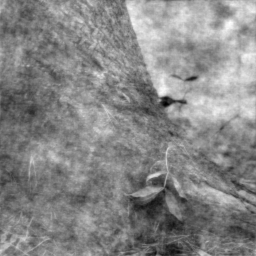

In [109]:
print("IM1_VER1 Result:\n")
im1_ver1, im1_ver1_array = get_image_from_path("im1_ver1.png")
im1_ver1

Lets Visualize all 3 images

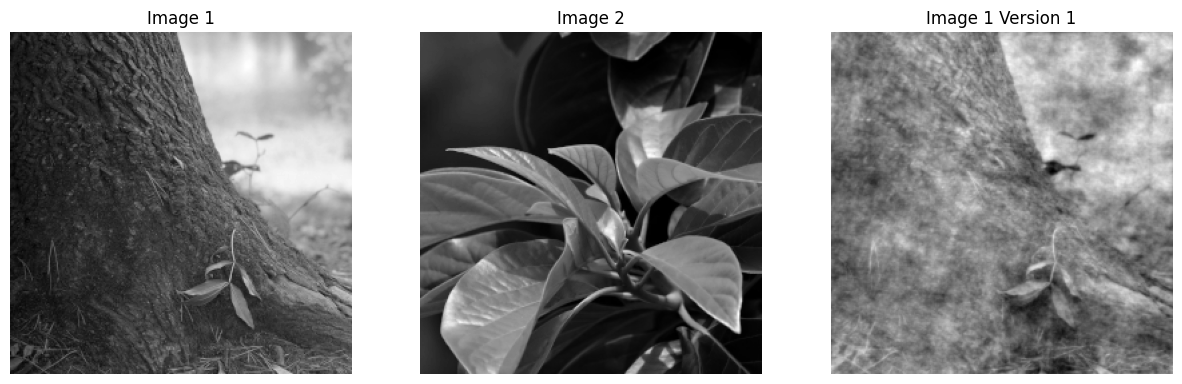

In [110]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].title.set_text("Image 1")
axs[0].imshow(im1, cmap='gray')
axs[0].axis('off')

axs[1].title.set_text("Image 2")
axs[1].imshow(im2, cmap='gray')
axs[1].axis('off')

axs[2].title.set_text("Image 1 Version 1")
axs[2].imshow(im1_ver1, cmap='gray')
axs[2].axis('off')

plt.show()

#### Im1_ver2
Im1 magnitude + Im2 phase

Generating complex number matrix i.e. `F` to pass to IDFT function

In [111]:
print("Madified DFT Matrix")
F = get_complex_from_magnitude_and_phase(im1_magnitude, im2_phase)
print(F)

Madified DFT Matrix
[[ 6.30630600e+06      +0.j          1.13222043e+06+1394118.79576024j
  -4.26463078e+05 +280832.63218798j ... -3.76801057e+05 +141951.26047896j
  -4.26463078e+05 -280832.63218798j  1.13222043e+06-1394118.79576012j]
 [-8.21055267e+05 +491025.94485252j -3.01652542e+05 +870970.36219184j
  -3.66278301e+05  +96160.97769827j ...  2.82110886e+04 -144011.148906j
  -8.56653930e+04  -51778.44504811j  3.57290115e+05  -25311.65307677j]
 [-4.94961769e+04 +184745.74563964j -1.35751167e+05  +98749.57005291j
   8.03784345e+04  -48801.70795577j ... -1.65678313e+04  +23540.91076091j
   8.04883995e+04  -87291.88384925j  5.06202411e+03 -173639.58165283j]
 ...
 [ 9.64561039e+04 +338207.0344785j  -1.97949614e+05 -168971.81073595j
   9.65206536e+03  +47837.37638901j ...  4.73204988e+04  -24347.3229248j
  -4.00300314e+04  -20660.94525786j -4.05796189e+04 +196136.62720946j]
 [-4.94961769e+04 -184745.74563964j  5.06202411e+03 +173639.58165283j
   8.04883995e+04  +87291.88384925j ...  1.02814

In [112]:
print("Creating modified image 2 Matrix")
im1_ver2_IDFT = IDFT(F)
print(im1_ver2_IDFT)

Creating modified image 2 Matrix
[[123.87522509+1.32587274e-11j  94.16773839+6.47304432e-12j
  104.60526161-1.03739239e-12j ...  39.00302768+4.97379915e-14j
   31.15264307-1.21502808e-12j  11.11664045+2.18847163e-12j]
 [139.20839595+1.11555210e-11j 108.29037397+5.95434813e-12j
   99.25594589-2.46558329e-12j ...  49.92697665+2.34479103e-13j
   42.98782688-1.91846539e-12j  17.47283588+1.89004368e-12j]
 [137.73932399+1.11981535e-11j 110.34070204+7.63833441e-12j
  102.30688909-1.52056145e-12j ...  38.59515482+6.53699317e-13j
   45.0195293 -2.07478479e-12j  19.44573829+1.13686838e-12j]
 ...
 [103.191507  +7.77333753e-12j  94.64302731+3.45323770e-12j
   96.81693601-5.91882099e-12j ...  31.62594058-8.52651283e-14j
   20.02638562-3.90798505e-13j   7.98859591-1.33582034e-12j]
 [105.62947959+1.42108547e-11j  90.60519604+8.62598881e-12j
   98.20039907-1.68398628e-12j ...  33.19476068+2.13162821e-12j
   20.69486512+9.59232693e-13j   9.70838876+3.22586402e-12j]
 [119.00258961+2.29221087e-11j  99.16

In [113]:
print("Converting Complex matrix to int matrix so that we can generate image")
im1_ver2_IDFT_int = complex_to_int(im1_ver2_IDFT)
print(f'Shape of im1_ver1_int: {im1_ver2_IDFT_int.shape}')
print(f'Dtype of im1_ver1_int: {im1_ver2_IDFT_int.dtype}')
print(f'Min value of im1_ver1_int: {im1_ver2_IDFT_int.min()}')
print(f'Max value of im1_ver1_int: {im1_ver2_IDFT_int.max()}')
print(im1_ver2_IDFT_int)

Converting Complex matrix to int matrix so that we can generate image
Shape of im1_ver1_int: (256, 256)
Dtype of im1_ver1_int: int64
Min value of im1_ver1_int: -50
Max value of im1_ver1_int: 321
[[124  94 105 ...  39  31  11]
 [139 108  99 ...  50  43  17]
 [138 110 102 ...  39  45  19]
 ...
 [103  95  97 ...  32  20   8]
 [106  91  98 ...  33  21  10]
 [119  99  97 ...  46  42  32]]


As we can see minimum value is -50 and maximum value is 321 i.e. both are out off rnage so we to get the pixcel value in range 0 to 255


In [114]:
print("TRansforming pixcel values in ranage 0-255")
im1_ver2_IDFT_int_in_range = (im1_ver2_IDFT_int - im1_ver2_IDFT_int.min()) / (im1_ver2_IDFT_int.max() - im1_ver2_IDFT_int.min()) * 255
print(im1_ver2_IDFT_int_in_range)

TRansforming pixcel values in ranage 0-255
[[119.59568733  98.97574124 106.53638814 ...  61.17250674  55.67385445
   41.92722372]
 [129.90566038 108.59838275 102.41239892 ...  68.73315364  63.92183288
   46.05121294]
 [129.21832884 109.97304582 104.47439353 ...  61.17250674  65.29649596
   47.42587601]
 ...
 [105.16172507  99.66307278 101.03773585 ...  56.36118598  48.11320755
   39.86522911]
 [107.22371968  96.91374663 101.72506739 ...  57.04851752  48.80053908
   41.23989218]
 [116.15902965 102.41239892 101.03773585 ...  65.98382749  63.23450135
   56.36118598]]


In [115]:
print(f'Min value of im1_ver1_int: {im1_ver2_IDFT_int_in_range.min()}')
print(f'Max value of im1_ver1_int: {im1_ver2_IDFT_int_in_range.max()}')

Min value of im1_ver1_int: 0.0
Max value of im1_ver1_int: 255.0


In [116]:
print("Converting numpy array into image")
im1_ver2 = Image.fromarray(im1_ver2_IDFT_int_in_range.astype('uint8'))
print("Image created succesfully. Saving the image")
im1_ver2.save("im1_ver2.png")

Converting numpy array into image
Image created succesfully. Saving the image


IM1_VER2 Result:



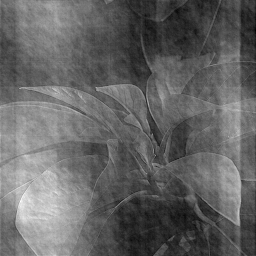

In [117]:
print("IM1_VER2 Result:\n")
im1_ver2, im1_ver2_array = get_image_from_path("im1_ver2.png")
im1_ver2

Lets Visualize all 3 images

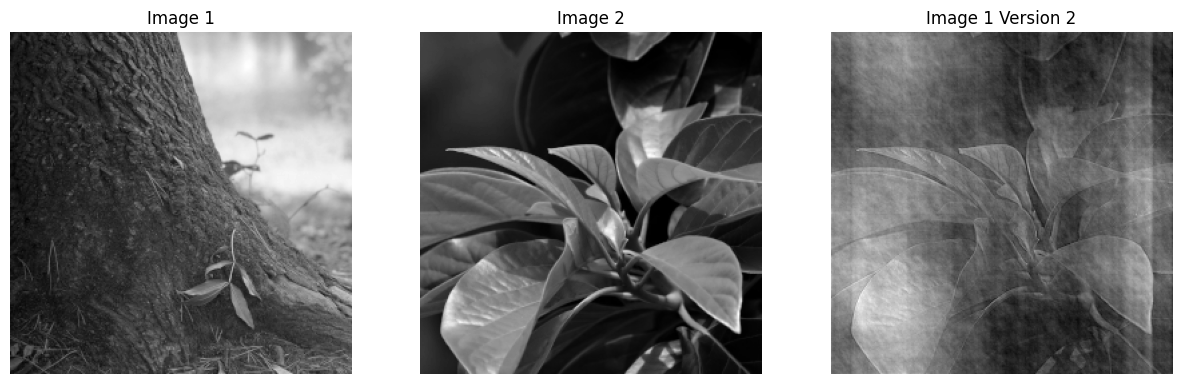

In [118]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].title.set_text("Image 1")
axs[0].imshow(im1, cmap='gray')
axs[0].axis('off')

axs[1].title.set_text("Image 2")
axs[1].imshow(im2, cmap='gray')
axs[1].axis('off')

axs[2].title.set_text("Image 1 Version 2")
axs[2].imshow(im1_ver2, cmap='gray')
axs[2].axis('off')

plt.show()

#### Result of Task 2

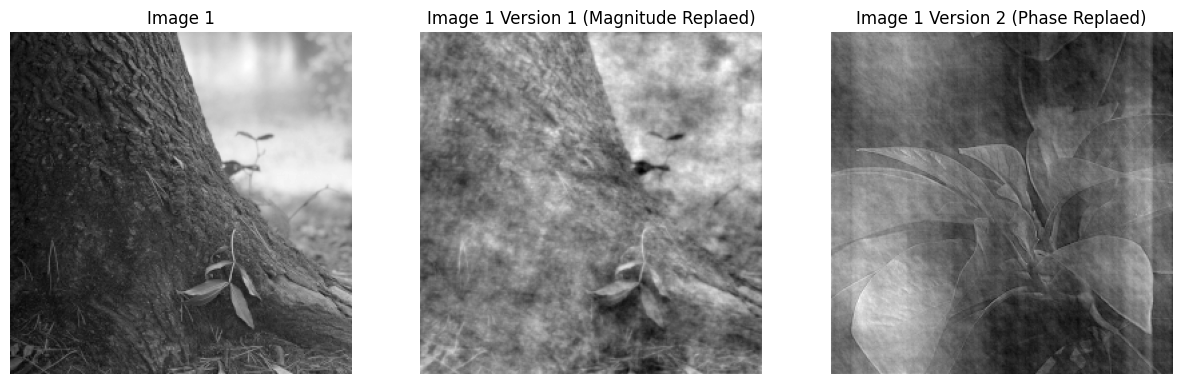

In [119]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].title.set_text("Image 1")
axs[0].imshow(im1, cmap='gray')
axs[0].axis('off')

axs[1].title.set_text("Image 1 Version 1 (Magnitude Replaed)")
axs[1].imshow(im1_ver1, cmap='gray')
axs[1].axis('off')

axs[2].title.set_text("Image 1 Version 2 (Phase Replaed)")
axs[2].imshow(im1_ver2, cmap='gray')
axs[2].axis('off')

plt.show()

<h3> Conclusion </h3>

As we know after performing DFT we get complex numbers and we calculate magnitude and phase from it.

Magnitude represents the amplitude of the diffrent frequencies.

Phase stores the position the different frquency.

for an image most important part is structure that is nothing but the position of an frquency of an image which leads us to conclude that phase is the most important part of an image. Magnitude also play important role as it store frquecy value but without structure it is worthless. But in opposite case even though we don't have amplitude we can still generate image just based structure.

The above theory is proved by im1_ver1 and im1_ver2
we can see that `im1_ver1` is more `closer` to `original` image.

Because in ver 1 we have changed the magnitude so with the help of phase that is image structure we get the closest image to original image.

On the other hand in version to we lost the structure. ver 2 is showing some other image structure / outline

## Task 3

### Aliasing in the frequency domain

Loading Image a_3_task_3_input_a.png


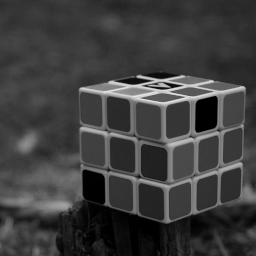

In [120]:
print("Loading Image a_3_task_3_input_a.png")
im_a_path = "/content/a_3_task_3_input_a.png"
im_a, im_a_array = get_image_from_path(im_a_path)
im_a

In [121]:
print("DFT and Magnitude")
dft_im_a = cv2.dft(np.float32(im_a_array), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted_a = np.fft.fftshift(dft_im_a)
magnitude_spectrum_a = cv2.magnitude(dft_shifted_a[:, :, 0], dft_shifted_a[:, :, 1])
original_log_img = np.log(magnitude_spectrum_a + 1)

DFT and Magnitude


In [122]:
print("Subsampled Image as per instructions: DFT and Magnitude")
subsampled_im_a_array = im_a_array.copy()
subsampled_im_a_array[::2, ::2] = 0
dft_subsampled_a = cv2.dft(np.float32(subsampled_im_a_array), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted_subsampled_a = np.fft.fftshift(dft_subsampled_a)
magnitude_spectrum_subsampled_a = cv2.magnitude(dft_shifted_subsampled_a[:, :, 0], dft_shifted_subsampled_a[:, :, 1])
subsampled_log_img2 = np.log(magnitude_spectrum_subsampled_a + 1)

Subsampled Image as per instructions: DFT and Magnitude


Plotting the magnitude of both


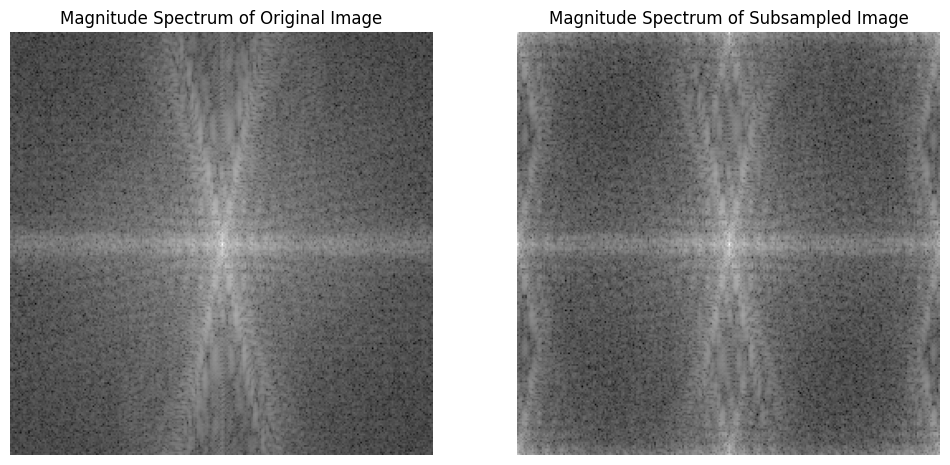

In [123]:
print("Plotting the magnitude of both")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Magnitude Spectrum of Original Image')
plt.imshow(original_log_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Magnitude Spectrum of Subsampled Image')
plt.imshow(subsampled_log_img2, cmap='gray')
plt.axis('off')

plt.show()


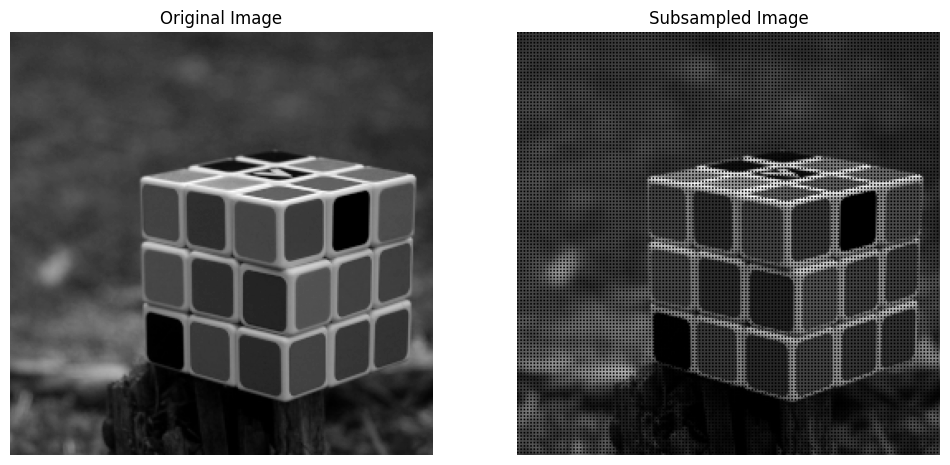

In [124]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im_a, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Subsampled Image')
plt.imshow(subsampled_im_a_array, cmap='gray')
plt.axis('off')

plt.show()

EXPLANATION !!!

**Original Image (Left):** The magnitude spectrum shows a clear central area for low frequencies and a structured pattern for high frequencies around it. The bright center represents lower frequency components, which help define the overall structure of the image.

**Subsampled Image (Right):** The magnitude spectrum of the subsampled image looks blurred and distorted. This happens because of aliasing, which occurs when we skip every other pixel. High-frequency details mix into lower frequencies, making the spectrum less clear. Patterns from the original image are not as sharp or distinct, especially around the edges.

The main difference is aliasing. It becomes more noticeable when we lose information by skipping pixels. This causes the frequency distribution to become less organized.

### Aliasing in the Spatial domain

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dft = cv2.dft(np.float32(cv2.imread('a_3_task_3_input_b.png', cv2.IMREAD_GRAYSCALE)), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum_original = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
magnitude_spectrum_original = np.log1p(magnitude_spectrum_original)
dft_shifted[:, ::3, :] = 0
magnitude_spectrum_original_normalized = cv2.normalize(magnitude_spectrum_original, None, 0, 255, cv2.NORM_MINMAX)
magnitude_spectrum_original_normalized = np.uint8(magnitude_spectrum_original_normalized)

magnitude_spectrum_subsampled = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
magnitude_spectrum_subsampled = np.log1p(magnitude_spectrum_subsampled)
magnitude_spectrum_subsampled_normalized = cv2.normalize(magnitude_spectrum_subsampled, None, 0, 255, cv2.NORM_MINMAX)
magnitude_spectrum_subsampled_normalized = np.uint8(magnitude_spectrum_subsampled_normalized)

idft_shifted = cv2.idft(np.fft.ifftshift(dft_shifted))
reconstructed_image = cv2.magnitude(idft_shifted[:, :, 0], idft_shifted[:, :, 1])

reconstructed_image_normalized = cv2.normalize(reconstructed_image, None, 0, 255, cv2.NORM_MINMAX)
reconstructed_image_normalized = np.uint8(reconstructed_image_normalized)


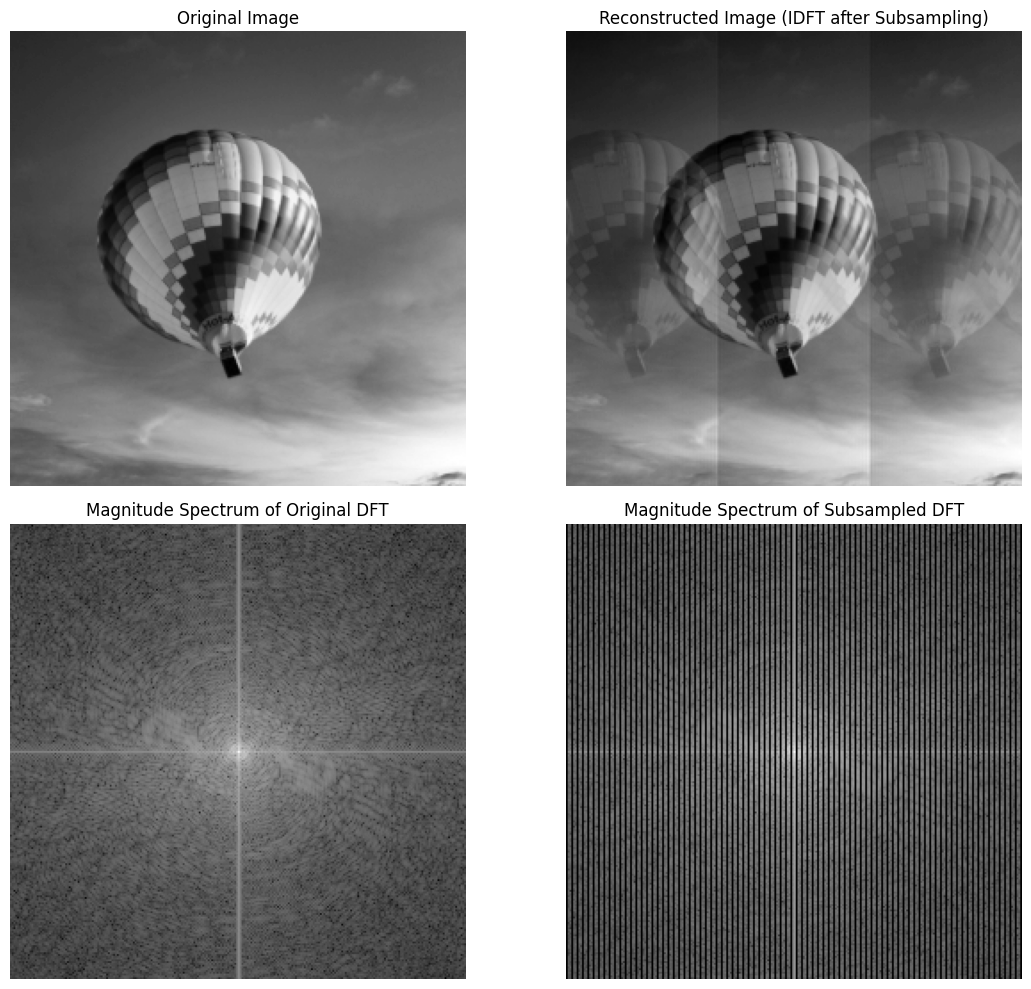

In [128]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Reconstructed Image (IDFT after Subsampling)')
plt.imshow(reconstructed_image_normalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Magnitude Spectrum of Original DFT')
plt.imshow(magnitude_spectrum_original_normalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Magnitude Spectrum of Subsampled DFT')
plt.imshow(magnitude_spectrum_subsampled_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

The "Reconstructed Image" shows some problems after subsampling and applying the inverse discrete Fourier transform (IDFT). Here are the main issues:

1. **Blurring or Ghosting**: The image looks like it has several faint copies of the original, especially on the right side. This happens because we skipped some data, causing these overlapping copies to appear.

2. **Distortion**: Some details, especially sharp areas, are lost, making the image look fuzzy. This loss is due to cutting out high-frequency details that give the image its clarity.

#### My VIew:

This problem is called **aliasing**. It happens when we don’t sample the image at a high enough rate to capture all its details. By removing every 3rd piece of data, we change the frequencies that describe the image, losing important information.

When we try to recreate the image, the missing parts cause those overlapping copies or "ghosts" to show up. How these ghosts look depends on how much data we skipped.

In short, subsampling leads to:

- **Loss of detail**: The image becomes blurry.
- **Aliased artifacts**: Faded copies of the image appear.

THANK YOU